In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.collections as mcollections

In [10]:
import pandas as pd

# CSV 파일 경로
csv_file_path = 'C:/ITStudy/03_SQL/project/co_emissions.csv'

# CSV 파일을 읽어서 데이터프레임으로 변환
df = pd.read_csv(csv_file_path)

# 데이터프레임 출력
print(df.head())  # 데이터프레임의 처음 5개 행 출력


        Entity Code  Year  Annual CO₂ emissions (per capita)
0  Afghanistan  AFG  1949                           0.001992
1  Afghanistan  AFG  1950                           0.011266
2  Afghanistan  AFG  1951                           0.012098
3  Afghanistan  AFG  1952                           0.011946
4  Afghanistan  AFG  1953                           0.013685


In [12]:
# Entity 열에서 고유 값 추출
entity = df['Entity'].unique()
entity

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Asia (excl. China and India)', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 

In [14]:
# 분석에 사용할 국가 목록
selected_countries = [
    'China', 'United States', 'India', 'Russia', 'Japan', 'Germany',
    'Brazil', 'Canada', 'South Korea', 'Indonesia', 'Mexico', 'Saudi Arabia',
    'Australia', 'Iran', 'United Kingdom', 'France', 'Italy', 'Turkey',
    'South Africa', 'Spain'
]

# 선택된 국가에 해당하지 않는 행을 드롭
df2 = df[df['Entity'].isin(selected_countries)]

# 필터링된 데이터프레임 출력
print(df2)

              Entity Code  Year  Annual CO₂ emissions (per capita)
1737       Australia  AUS  1750                           0.000000
1738       Australia  AUS  1760                           0.000000
1739       Australia  AUS  1770                           0.000000
1740       Australia  AUS  1780                           0.000000
1741       Australia  AUS  1790                           0.000000
...              ...  ...   ...                                ...
25274  United States  USA  2018                          16.191355
25275  United States  USA  2019                          15.739861
25276  United States  USA  2020                          14.034053
25277  United States  USA  2021                          14.932488
25278  United States  USA  2022                          14.949616

[3292 rows x 4 columns]


In [16]:
df2

,Entity,Code,Year,Annual CO₂ emissions (per capita)
1737,Australia,AUS,1750,0.000000
1738,Australia,AUS,1760,0.000000
1739,Australia,AUS,1770,0.000000
1740,Australia,AUS,1780,0.000000
1741,Australia,AUS,1790,0.000000
...,...,...,...,...
25274,United States,USA,2018,16.191355
25275,United States,USA,2019,15.739861
25276,United States,USA,2020,14.034053
25277,United States,USA,2021,14.932488


In [18]:
# Year 열에서 1850년 이전의 값 제거
df2 = df2[df2['Year'] >= 1850]

In [20]:
df2

,Entity,Code,Year,Annual CO₂ emissions (per capita)
1792,Australia,AUS,1850,0.179979
1793,Australia,AUS,1851,0.160435
1794,Australia,AUS,1852,0.148985
1795,Australia,AUS,1853,0.197876
1796,Australia,AUS,1854,0.220470
...,...,...,...,...
25274,United States,USA,2018,16.191355
25275,United States,USA,2019,15.739861
25276,United States,USA,2020,14.034053
25277,United States,USA,2021,14.932488


In [22]:
# 인덱스를 1부터 시작하도록 재설정
df2.reset_index(drop=True, inplace=True)
df2.index = df2.index + 1
df2

,Entity,Code,Year,Annual CO₂ emissions (per capita)
1,Australia,AUS,1850,0.179979
2,Australia,AUS,1851,0.160435
3,Australia,AUS,1852,0.148985
4,Australia,AUS,1853,0.197876
5,Australia,AUS,1854,0.220470
...,...,...,...,...
2961,United States,USA,2018,16.191355
2962,United States,USA,2019,15.739861
2963,United States,USA,2020,14.034053
2964,United States,USA,2021,14.932488


In [24]:
# 열 이름 변경
df2.rename(columns={
    'Entity': 'Country',
    'Code': 'Code',
    'Year': 'Year',
    'Annual CO₂ emissions (per capita)': 'CO2 Emissions'
}, inplace=True)

C:\Users\jiisuu\AppData\Local\Temp\ipykernel_20808\2447931906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={


In [26]:
df2

,Country,Code,Year,CO2 Emissions
1,Australia,AUS,1850,0.179979
2,Australia,AUS,1851,0.160435
3,Australia,AUS,1852,0.148985
4,Australia,AUS,1853,0.197876
5,Australia,AUS,1854,0.220470
...,...,...,...,...
2961,United States,USA,2018,16.191355
2962,United States,USA,2019,15.739861
2963,United States,USA,2020,14.034053
2964,United States,USA,2021,14.932488


In [28]:
# Annual CO2 Emissions (per capita) 열의 값을 소수점 3자리까지 반올림
df2['CO2 Emissions'] = df2['CO2 Emissions'].round(3)

C:\Users\jiisuu\AppData\Local\Temp\ipykernel_20808\649819811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CO2 Emissions'] = df2['CO2 Emissions'].round(3)


In [30]:
df2

,Country,Code,Year,CO2 Emissions
1,Australia,AUS,1850,0.180
2,Australia,AUS,1851,0.160
3,Australia,AUS,1852,0.149
4,Australia,AUS,1853,0.198
5,Australia,AUS,1854,0.220
...,...,...,...,...
2961,United States,USA,2018,16.191
2962,United States,USA,2019,15.740
2963,United States,USA,2020,14.034
2964,United States,USA,2021,14.932


In [32]:
data = df2.copy()

In [34]:
data

,Country,Code,Year,CO2 Emissions
1,Australia,AUS,1850,0.180
2,Australia,AUS,1851,0.160
3,Australia,AUS,1852,0.149
4,Australia,AUS,1853,0.198
5,Australia,AUS,1854,0.220
...,...,...,...,...
2961,United States,USA,2018,16.191
2962,United States,USA,2019,15.740
2963,United States,USA,2020,14.034
2964,United States,USA,2021,14.932


In [36]:
data.to_csv('co.csv',index=False)

In [38]:
def plot_top_countries_by_year(year):
    # 입력받은 연도에 가장 탄소 배출량이 높은 나라 5곳
    top_countries = data[data['Year'] == year].nlargest(5, 'CO2 Emissions')
    print(f"{year}년의 탄소 배출량이 가장 높은 나라 5곳:")
    print(top_countries)
    
    # 각 막대의 색상을 다르게 설정
    colors = cm.viridis(np.linspace(0, 1, len(top_countries)))
    
    # 탄소 배출량 시각화
    fig, ax = plt.subplots(figsize=(15, 8))  # 가로로 길게 설정
    ax.bar(top_countries['Country'], top_countries['CO2 Emissions'], color=colors)
    ax.set_xlabel('Country',fontsize=14,color='red')
    ax.set_ylabel('CO2 Emissions',fontsize=14,color='blue')
    ax.tick_params(axis='x', labelsize=12)  # x축 틱 라벨 크기 설정
    ax.set_title(f'Top 5 CO2 Emissions by Country in {year}',fontsize = 20)
    plt.show()

2000년의 탄소 배출량이 가장 높은 나라 5곳:
            Country Code  Year  CO2 Emissions
2943  United States  USA  2000         21.282
446          Canada  CAN  2000         18.482
151       Australia  AUS  2000         18.404
2013   Saudi Arabia  SAU  2000         14.031
908         Germany  DEU  2000         11.023


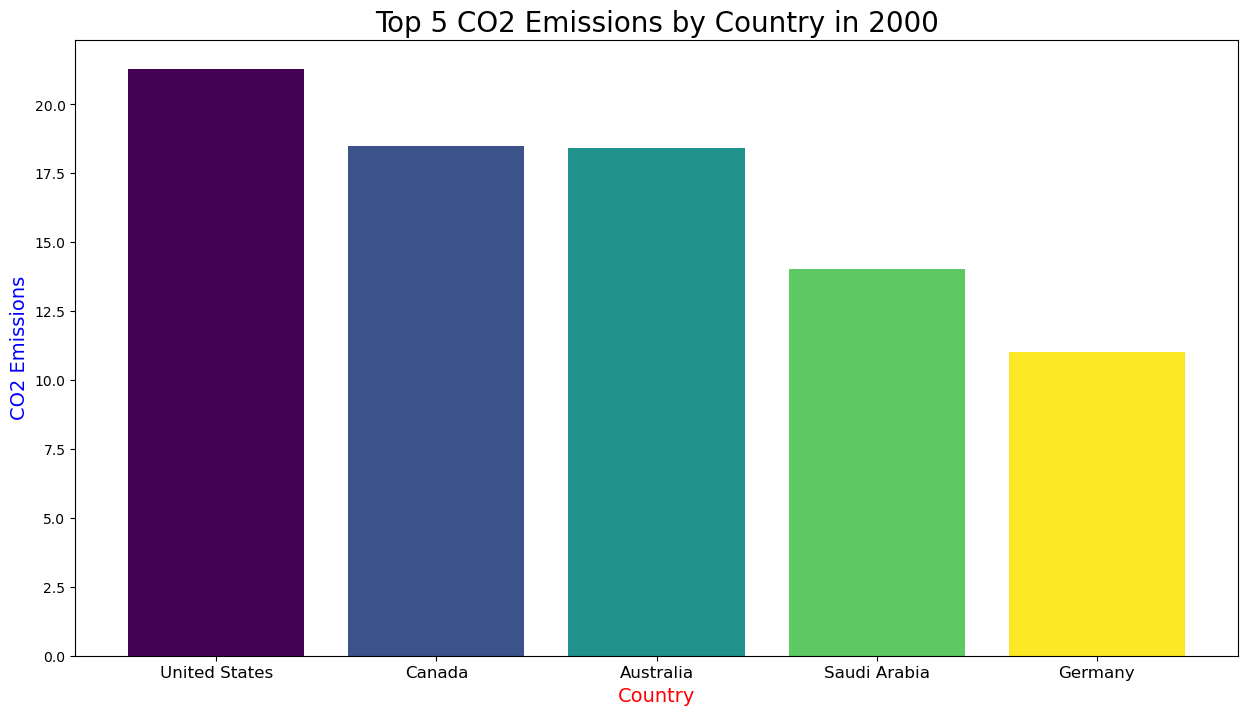

In [40]:
plot_top_countries_by_year(2000)

In [119]:
def plot_emissions_over_time(country):
    # 입력 받은 나라의 1850년~2022년 까지의 탄소 배출량 변화 그래프
    country_data = data[data['Country'] == country]
    print(f"{country}의 탄소 배출량 변화 (1850-2022):")
    print(country_data)
    
    # 탄소 배출량 변화 시각화
    fig, ax = plt.subplots(figsize=(15, 8))  # 가로로 길게 설정
    
    # 그라데이션 색상 설정
    points = np.array([country_data['Year'], country_data['CO2 Emissions']]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    norm = plt.Normalize(country_data['CO2 Emissions'].min(), country_data['CO2 Emissions'].max())
    lc = mcollections.LineCollection(segments, cmap='viridis', norm=norm)
    lc.set_array(country_data['CO2 Emissions'])
    lc.set_linewidth(2)
    line = ax.add_collection(lc)
    fig.colorbar(line, ax=ax)

    ax.set_xlabel('Year', fontsize=14,color='red')  # x축 글씨 크기 설정
    ax.set_ylabel('CO2 Emissions', fontsize=14,color='blue')  # y축 글씨 크기 설정
    ax.set_title(f'CO2 Emissions Over Time in {country}', fontsize=20)  # 제목 글씨 크기 설정
    ax.tick_params(axis='x', labelsize=12)  # x축 틱 라벨 크기 설정
    
    ax.set_xlim(country_data['Year'].min(), country_data['Year'].max())
    ax.set_ylim(country_data['CO2 Emissions'].min(), country_data['CO2 Emissions'].max())
    
    plt.show()

Australia의 탄소 배출량 변화 (1850-2022):
       Country Code  Year  CO2 Emissions
1    Australia  AUS  1850          0.180
2    Australia  AUS  1851          0.160
3    Australia  AUS  1852          0.149
4    Australia  AUS  1853          0.198
5    Australia  AUS  1854          0.220
..         ...  ...   ...            ...
169  Australia  AUS  2018         16.628
170  Australia  AUS  2019         16.398
171  Australia  AUS  2020         15.453
172  Australia  AUS  2021         14.915
173  Australia  AUS  2022         14.985

[173 rows x 4 columns]


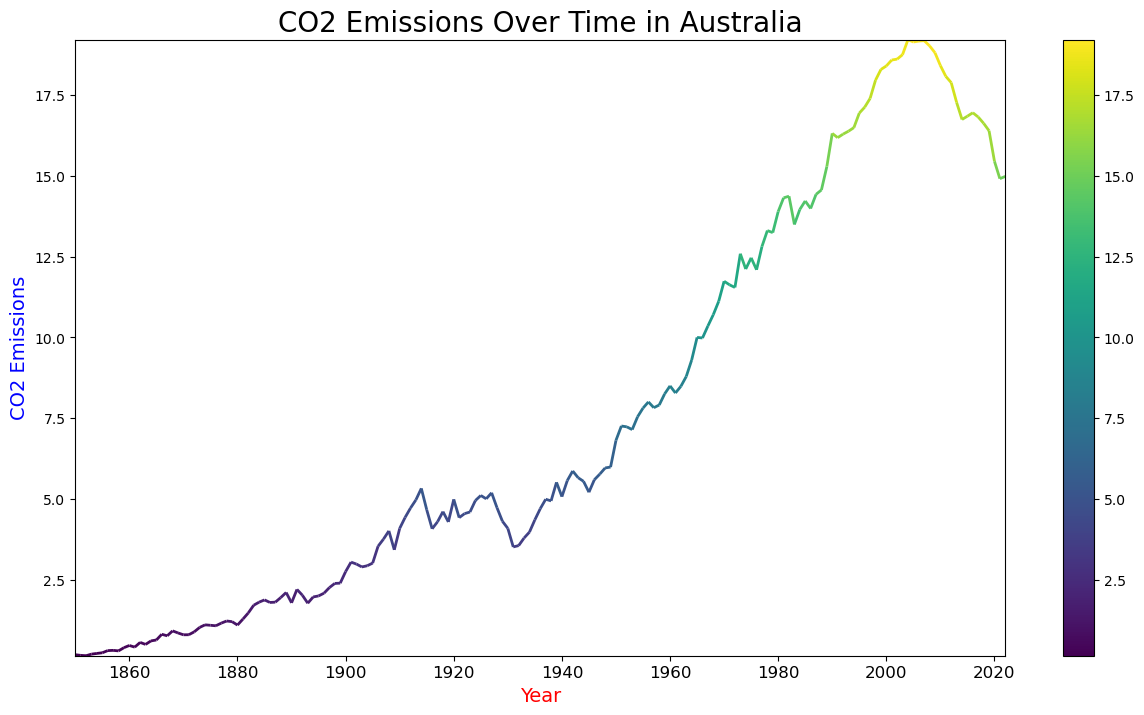

In [121]:
plot_emissions_over_time('Australia')

분석할 방법을 선택하세요:
1. 연도별 분석
2. 나라별 분석
3. 종료


선택 (1, 2, 3):  1
연도를 입력하세요:  2012


2012년의 탄소 배출량이 가장 높은 나라 5곳:
            Country Code  Year  CO2 Emissions
2025   Saudi Arabia  SAU  2012         18.391
163       Australia  AUS  2012         17.888
2955  United States  USA  2012         16.877
458          Canada  CAN  2012         16.309
2278    South Korea  KOR  2012         12.651


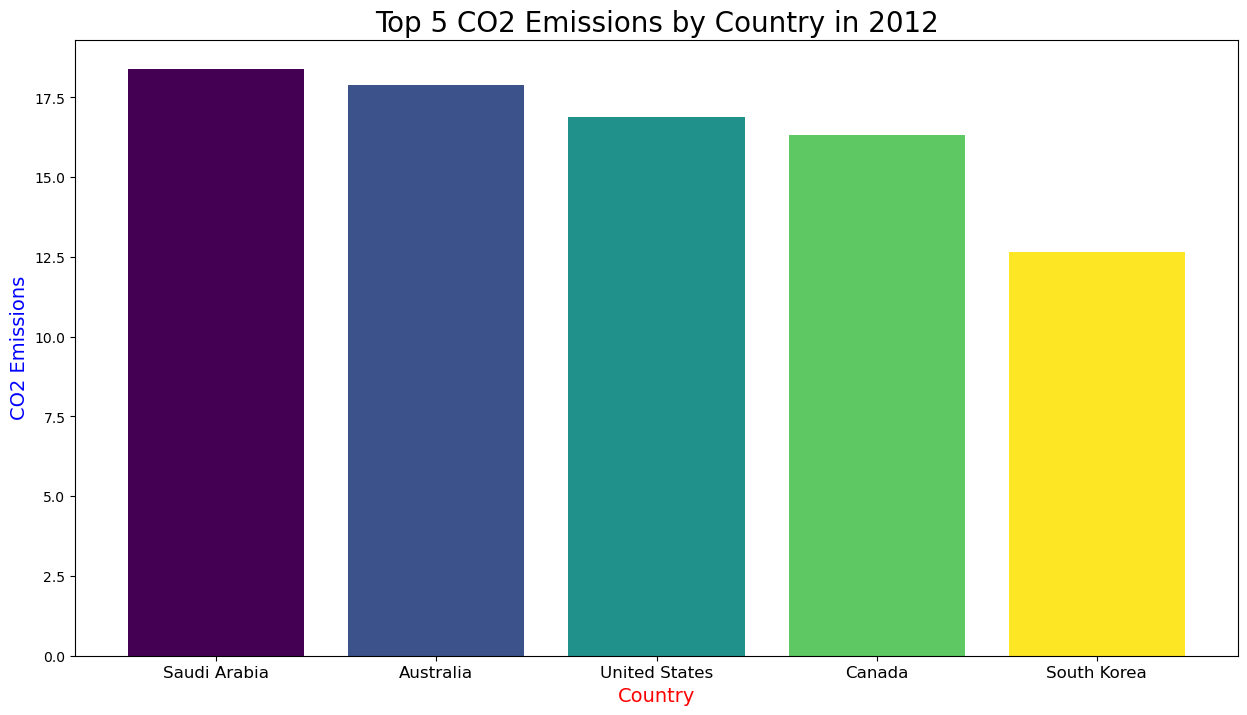

분석할 방법을 선택하세요:
1. 연도별 분석
2. 나라별 분석
3. 종료


선택 (1, 2, 3):  


잘못된 입력입니다. 다시 시도하세요.
분석할 방법을 선택하세요:
1. 연도별 분석
2. 나라별 분석
3. 종료


In [ ]:
def main():
    while True:
        print("분석할 방법을 선택하세요:")
        print("1. 연도별 분석")
        print("2. 나라별 분석")
        print("3. 종료")
        choice = input("선택 (1, 2, 3): ")
        
        if choice == '1':
            year = int(input("연도를 입력하세요: "))
            plot_top_countries_by_year(year)
        elif choice == '2':
            country = input("나라를 입력하세요: ")
            plot_emissions_over_time(country)
        elif choice == '3':
            print("프로그램을 종료합니다.")
            break
        else:
            print("잘못된 입력입니다. 다시 시도하세요.")

if __name__ == "__main__":
    main()